In [31]:
import datetime as dt
import numpy as np
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc
from sqlalchemy.sql import label
import matplotlib.pyplot as plt

In [32]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [33]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [34]:
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [35]:
session = Session(bind = engine)

In [36]:
results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= '2016-08-23')

In [37]:
data = {'date': [], 'precip': []}
for row in results:
    data['date'].append(row.date)
    data['precip'].append(row.prcp)
precip = pd.DataFrame(data['precip'], columns = ['prcp'], index = data['date'])

In [38]:
precip.head()

,prcp
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


<function matplotlib.pyplot.show>

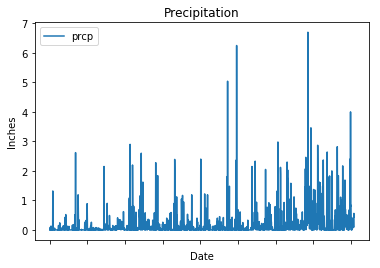

In [39]:
bar = precip.plot(x = precip.index, y = 'prcp')
bar.set_title(f'Precipitation')
bar.set_ylabel('Inches')
bar.set_xlabel('Date')
plt.show

In [40]:
stations_results = session.query(func.count(Stations.station)).all()
print(f'Total Stations: {str(stations_results[0][0])}')

Total Stations: 9


In [41]:
active_results = session.query(Measurements.station,
    label('date', func.count(Measurements.date))).group_by(Measurements.station).all()

station_count = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc())
for station in station_count:
    print(station)

('USC00519281', 2772)
('USC00513117', 2696)
('USC00519397', 2685)
('USC00519523', 2572)
('USC00516128', 2484)
('USC00514830', 1937)
('USC00511918', 1932)
('USC00517948', 683)
('USC00518838', 342)


In [42]:
top_station = station_count[0][0]
print(f'{top_station} has the most observations')

USC00519281 has the most observations


In [43]:
temp_data = session.query(Measurements.station, Measurements.date, Measurements.tobs).filter(Measurements.date >= '2016-08-23').filter(Measurements.station == top_station).order_by(Measurements.date).all()
temp_data

[('USC00519281', '2016-08-23', 77),
 ('USC00519281', '2016-08-24', 77),
 ('USC00519281', '2016-08-25', 80),
 ('USC00519281', '2016-08-26', 80),
 ('USC00519281', '2016-08-27', 75),
 ('USC00519281', '2016-08-28', 73),
 ('USC00519281', '2016-08-29', 78),
 ('USC00519281', '2016-08-30', 77),
 ('USC00519281', '2016-08-31', 78),
 ('USC00519281', '2016-09-01', 80),
 ('USC00519281', '2016-09-02', 80),
 ('USC00519281', '2016-09-03', 78),
 ('USC00519281', '2016-09-04', 78),
 ('USC00519281', '2016-09-05', 78),
 ('USC00519281', '2016-09-06', 73),
 ('USC00519281', '2016-09-07', 74),
 ('USC00519281', '2016-09-08', 80),
 ('USC00519281', '2016-09-09', 79),
 ('USC00519281', '2016-09-10', 77),
 ('USC00519281', '2016-09-11', 80),
 ('USC00519281', '2016-09-12', 76),
 ('USC00519281', '2016-09-13', 79),
 ('USC00519281', '2016-09-14', 75),
 ('USC00519281', '2016-09-15', 79),
 ('USC00519281', '2016-09-16', 78),
 ('USC00519281', '2016-09-17', 79),
 ('USC00519281', '2016-09-18', 78),
 ('USC00519281', '2016-09-19

In [44]:
t_data = {'date': [], 'temp': []}
for row in temp_data:
    t_data['date'].append(row[1])
    t_data['temp'].append(row[2])
temp_df = pd.DataFrame(t_data['temp'], columns = ['temp'], index = t_data['date'])
temp_df.head()

,temp
2016-08-23,77
2016-08-24,77
2016-08-25,80
2016-08-26,80
2016-08-27,75


<function matplotlib.pyplot.show>

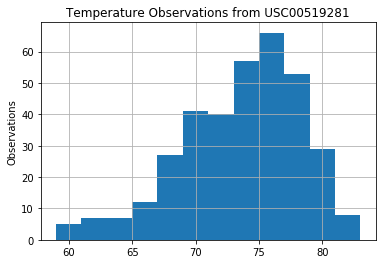

In [45]:
hist = temp_df['temp'].hist(bins = 12)
hist.set_title(f'Temperature Observations from {top_station}')
hist.set_ylabel('Observations')
plt.show

In [50]:
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

In [59]:
temperatures = (calc_temps('2017-08-16','2017-08-23'))
temperatures_df = pd.DataFrame.from_records(temperatures, columns = ['tmin', 'tavg', 'tmax'])
temperatures_df.head()

,tmin,tavg,tmax
0,71,78.5,83


In [65]:
temperatures_df.tmin

0    71
Name: tmin, dtype: int64

<function matplotlib.pyplot.show>

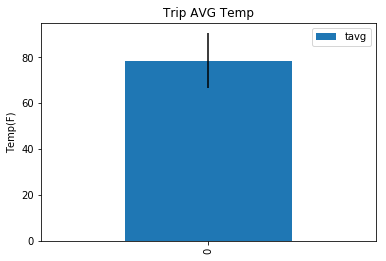

In [68]:
temp_chart = temperatures_df[['tavg']].plot(kind = 'bar', title = 'Trip AVG Temp', legend = True, yerr = [temperatures_df.tmax-temperatures_df.tmin])
temp_chart.set_ylabel('Temp(F)')
plt.show